In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json

In [2]:
def beta_irt(thetai, deltaj, aj):
    p1 = ((deltaj)/(1 - deltaj))** aj
    p2 = ((thetai)/(1 - thetai))** -aj
    den = 1 + p1 * p2
    return 1/den

In [3]:
users = open("./../MovieLens/basic/users_basic_sample_section.csv").read().split('\n')

In [34]:
##### PARAMETERS #####
params_file = "../BIRT/beta_irt/results/recommendation/irt_parameters_vi_recommendation_s300_f20_sd1_am1@0_as1@0.csv"
params = pd.read_csv(params_file)
params = params.values

In [15]:
##### PARAMETERS #####
responses_file = "../BIRT/beta_irt/irt_data_recommendation_s300_f20_sd1.csv"
responses = pd.read_csv(responses_file)
responses = responses.values

In [3]:
##### ABILITIES #####
abilities_file = "../BIRT/beta_irt/results/recommendation/irt_ability_vi_recommendation_s300_f20_sd1_am1@0_as1@0.csv"
abilities = pd.read_csv(abilities_file)
abilities = abilities.values[:-1] #stddev line
abilities_v = [value for _, value in abilities]
abilities_n = [name for name, _ in abilities]

In [33]:
##### UNIFORMELY DISTRIBUTED ABILITIES (0,1) #####
ab_lins = np.linspace(0.0001, 1, num = 300)
colors = ["#16a085", "#27ae60", "#2980b9", "#8e44ad", "#2c3e50", "#f1c40f", "#e67e22", "#e74c3c", "#ecf0f1", "#95a5a6"]

for i, param in enumerate(params):
    fig, ax = plt.subplots()
    
    exp_responses = []
    for ab in ab_lins:
        exp_responses.append(beta_irt(thetai = ab,\
                                      deltaj = param[0],\
                                      aj = param[1]))

    # Plot response curves
    ax.plot(ab_lins, exp_responses)
    ax.scatter(abilities_v, responses[i], c=colors)
    
    patches = []
    for j, (name, _) in enumerate(abilities):
        patches.append(mpatches.Patch(color=colors[j], label=name))
    lgd = plt.legend(handles=patches, bbox_to_anchor=(1, 1))
    
    ax.set_xlabel('Ability')
    ax.set_ylabel('Response')
    ax.set_title('User {}'.format(users[i]))
    fig.savefig('./charts/rmse/300/chart_' + str(i) + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

NameError: name 'params' is not defined

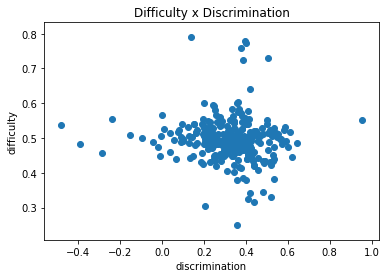

In [38]:
plt.scatter(y=[difficulty for difficulty, _ in params], x=[discrimination for _, discrimination in params])
plt.xlabel('discrimination')
plt.ylabel('difficulty')
plt.title('Difficulty x Discrimination')
plt.savefig('./charts/rmse/difficulty_discrimination.png')
plt.show()

In [12]:
result = json.load(open('./Results/Surprise/rmse/rmse_results.json'))
result.keys()

dict_keys(['BaselineOnly', 'CoClustering', 'KNNBasic_ItemBased', 'KNNBasic_UserBased', 'KNNWithMeans_ItemBased', 'KNNWithMeans_UserBased', 'NMF', 'NormalPredictor', 'SVD', 'SlopeOne'])

In [4]:
abilities

array([['BaselineOnly', 0.4911056],
       ['CoClustering', 0.506204],
       ['KNNBasic_ItemBased', 0.5173763],
       ['KNNBasic_UserBased', 0.48691717],
       ['KNNWithMeans_ItemBased', 0.5379228],
       ['KNNWithMeans_UserBased', 0.4663052],
       ['NMF', 0.5201365],
       ['NormalPredictor', 0.45943874],
       ['SVD', 0.5135856],
       ['SlopeOne', 0.51845795]], dtype=object)

In [21]:
avg_response = [sum(alg)/300 for alg in list(map(list, zip(*responses)))]

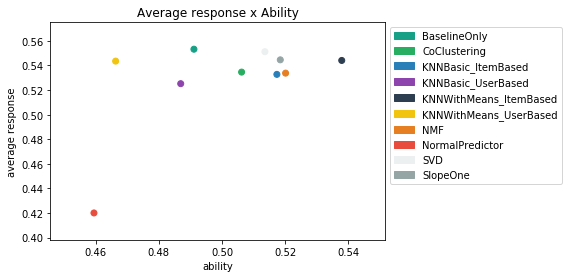

In [37]:
colors = ["#16a085", "#27ae60", "#2980b9", "#8e44ad", "#2c3e50", "#f1c40f", "#e67e22", "#e74c3c", "#ecf0f1", "#95a5a6"]

plt.scatter(y=avg_response, x=[ability for _, ability in abilities], c=colors)

plt.xlabel('ability')
plt.ylabel('average response')
plt.title('Average response x Ability')
patches = []
for j, (name, _) in enumerate(abilities):
    patches.append(mpatches.Patch(color=colors[j], label=name))
lgd = plt.legend(handles=patches, bbox_to_anchor=(1, 1))

plt.savefig('./charts/rmse/avg_response_ability.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()